In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [11]:
#nltk.download('punkt_tab')

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [13]:
len(data)

13871

In [14]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [15]:
sample_data = data['text'][:1000]

In [16]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [17]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [18]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.dv.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.dv['1'])

V1_infer [ 0.0248911  -0.05888919 -0.0597875   0.13219644  0.02648227  0.06827409
  0.02134838 -0.00096629 -0.24122427  0.16418506 -0.01442914 -0.05022816
 -0.06842063 -0.01076464  0.20793003  0.12317057  0.0965507  -0.04832436
 -0.1314169  -0.07404351]
[('476', 0.8689276576042175), ('931', 0.8052963018417358), ('227', 0.7474571466445923), ('809', 0.7422003149986267), ('294', 0.7349004149436951), ('507', 0.7147338390350342), ('115', 0.7045338749885559), ('823', 0.7025005221366882), ('700', 0.7000255584716797), ('940', 0.6938211917877197)]
[-2.5123496  5.822914   1.9975276  2.4827416 -0.3929144  2.3253639
 -3.1004908 -1.4692545 -1.45526    1.029586   4.350742  -3.52886
 -3.3576446  1.896929   1.2922477 -4.9209623  8.328771  -1.0586221
 -5.5435853 -5.927622 ]


In [19]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [20]:
list(doc_vectors.values())[1]

array([-0.08245678, -0.01349721,  0.38932684,  0.14067766, -0.08553229,
        0.03430085,  0.06452011,  0.40582082, -0.33518323, -0.04557222,
        0.3159303 , -0.24665354,  0.22249185,  0.00200262,  0.388473  ,
        0.12769055,  0.6309751 , -0.10771477, -0.5432615 , -0.6626158 ],
      dtype=float32)

In [22]:
#perform k-means clustering on embedded documents

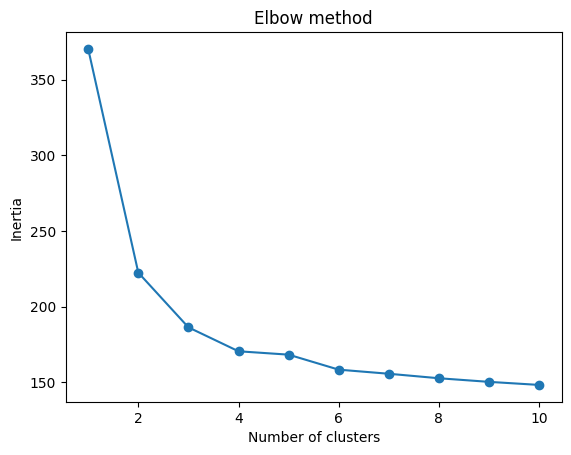

In [21]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
num_clusters = 3

In [24]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [25]:
#find centroids. compute bigram closest to centroid

In [26]:
centroids  = kmeans.cluster_centers_; centroids

array([[-0.02056235,  0.00656609,  0.35550163,  0.27577753, -0.17407822,
        -0.10276611,  0.2096227 ,  0.53449376, -0.59050384, -0.02416028,
         0.3818063 , -0.1727952 ,  0.37492461,  0.044367  ,  0.46158469,
         0.33828142,  0.75844013, -0.15306927, -0.57989166, -0.75809616],
       [-0.03295364,  0.00778101,  0.23325733,  0.17445151, -0.12463054,
        -0.0636398 ,  0.14521731,  0.35856333, -0.40623064, -0.01690597,
         0.26487737, -0.11294493,  0.24156785,  0.02311865,  0.31178432,
         0.23939866,  0.52245559, -0.10667135, -0.39540955, -0.5200364 ],
       [-0.01672724,  0.00915111,  0.11901661,  0.09199962, -0.06320158,
        -0.02090909,  0.08092056,  0.1831287 , -0.21201768, -0.01018995,
         0.14063155, -0.06035324,  0.13922218,  0.01043755,  0.16188117,
         0.13305635,  0.27060188, -0.05194817, -0.20741297, -0.27023505]])

In [27]:
#build vocabulary
vocab = []
for doc in sample_data:
    vocab += word_tokenize(doc.lower())
vocab = list(set(vocab))

In [28]:
#a selection of poliical words 
political_words = [
    "democracy", "republic", "monarchy", "constitution", "senate", "parliament",
    "legislature", "bill", "law", "amendment", "veto", "executive", "judiciary",
    "congress", "cabinet", "prime", "president", "governor", "mayor", "election",
    "ballot", "referendum", "campaign", "lobby", "politician", "party", "coalition",
    "majority", "minority", "opposition", "incumbent", "candidate", "policy", "platform",
    "ideology", "socialism", "capitalism", "communism", "fascism", "nationalism",
    "populism", "liberalism", "conservatism", "progressivism", "federalism", "state",
    "municipality", "autonomy", "centralization", "devolution", "impeachment", "coup",
    "revolution", "sanction", "diplomacy", "treaty", "alliance", "sovereignty", "bureaucracy",
    "civil", "liberty", "freedom", "justice", "equality", "taxation", "welfare", "healthcare",
    "education", "defense", "security", "immigration", "trade", "tariff", "budget", "deficit",
    "debt", "regulation", "deregulation", "policy", "interest", "NGO", "PAC", "grassroots",
    "superpower", "diplomacy", "NATO", "UN", "electoral", "gerrymandering", "filibuster",
    "constituent", "suffrage", "pluralism", "bipartisanship", "caucus", "midterms",
    "progressive", "liberal", "conservative", "leftist", "right-wing", "vote", "redistricting"
]

In [29]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_words)):
    for j in range(i+1,len(political_words)):
        bigrams.append(political_words[i] + " " + political_words[j])

In [30]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [31]:
list(bigram_vecs.values())[0]

array([-0.01755571,  0.00636013, -0.03923595,  0.05372287,  0.05779147,
       -0.02446675,  0.00119146,  0.03737524, -0.07287658, -0.07639946,
        0.07836172, -0.06168408,  0.03231692, -0.014887  ,  0.02814304,
        0.04225562, -0.03150792,  0.05881562, -0.07966392, -0.0409288 ],
      dtype=float32)

In [32]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [33]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [34]:
nearest_bigram_to_centroid

[('liberty taxation', -0.7286611942265722),
 ('liberty taxation', -0.7253825098982122),
 ('liberalism centralization', -0.7250152168392848)]

In [ ]:
#use TF-IDF of simply do a frequency count of words occuring in each centroid

In [35]:
labeled_data = zip(sample_data,kmeans.labels_)

In [36]:
#build vocabulary
cluster_vocab = [[] for centroid in centroids]
for doc, label in list(labeled_data):
    cluster_vocab[label] += word_tokenize(doc.lower())
cluster_vocab = [list(set(vocab)) for vocab in cluster_vocab]

In [37]:
len(cluster_vocab[0])

1895

In [1]:
from collections import Counter
cluster_counts = Counter(cluster_vocab[0])

NameError: name 'cluster_vocab' is not defined

In [9]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [11]:
#pip install spacy-lookups-data
from spacy.lookups import load_lookups
lookups = load_lookups("en", ["lexeme_prob"])
nlp.vocab.lookups.add_table("lexeme_prob", lookups.get_table("lexeme_prob"))

ValueError: [E158] Can't add table 'lexeme_prob' to lookups because it already exists.

In [ ]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,L)